# Analyzing @realDonaldTrump Twitter Word Usage from Jan 10 to Jan 17 2020

## Step 1. Read Important Libraries

In [15]:
import numpy as np
import pandas as pd
import tweepy
from datetime import datetime, date, time, timedelta
from collections import Counter
import sys
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
import regex
from nltk import tokenize
from nltk.tokenize import TweetTokenizer

## Step 2. Authenticate to Twitter

Put 4 APIs in a csv and read them

In [31]:
API = pd.read_csv('API.csv')

'mdT5G1snukbDxlX7jttQ6cr4S'

In [32]:
auth = tweepy.OAuthHandler(API['API'][0], API['API'][1])
auth.set_access_token(API['API'][2], API['API'][3])

In [33]:
api = tweepy.API(auth)

## Step 3. Getting Trump's Twitter contents and date

Define function to get date and contents

In [34]:
def Tweets(User):
    All = api.user_timeline(screen_name=User,include_rts = False,count=200,exclude_replies=True,tweet_mode="extended")
    Tweet = []
    Date = []
    for tweet in All:
        if tweet.created_at > datetime(2020,1,10,0,0,0) and tweet.created_at < datetime(2020,1,18,0,0,0):
            Tweet.append(tweet.full_text)
            Date.append(tweet.created_at)
    User_Tweets = pd.DataFrame({'Date':Date,'Tweets':Tweet})
    return User_Tweets

Specify Trump's Twitter account

In [35]:
Tweets = Tweets('realDonaldTrump')

In [36]:
Tweets

,Date,Tweets
0,2020-01-17 23:10:50,مردم نجیب ایران، که آمریکا را دوست می دارند، س...
1,2020-01-17 23:10:21,The noble people of Iran—who love America—dese...
2,2020-01-17 22:22:05,"The so-called “Supreme Leader” of Iran, who ha..."
3,2020-01-17 22:22:05,Your 2nd Amendment is under very serious attac...
4,2020-01-17 22:22:04,Words of wisdom. Thank you Ted! https://t.co/L...
5,2020-01-17 20:10:15,Heading to Florida for big Republican Party ev...
6,2020-01-17 15:35:00,They are rigging the election again against Be...
7,2020-01-17 15:17:43,"Getting ready to meet the LSU Tigers, the Nati..."
8,2020-01-17 14:12:06,Mini Mike Bloomberg ads are purposely wrong - ...
9,2020-01-17 13:39:21,Mini Mike Bloomberg doesn’t get on the Democra...


## Step 4. Sentence and Words Manipulation

Remove all other languages (Such as Arabic), number and symbols

In [7]:
Sentence=[]
i = 0
while i<len(Tweets['Tweets']):
    Sentence.append(regex.sub('[^\p{Latin}]',' ', Tweets['Tweets'][i]))
    i=i+1
Sentence

['                                                                                                                                                                                                                                                                                     https   t co RLjGsC WLc',
 'The noble people of Iran who love America deserve a government that s more interested in helping them achieve their dreams than killing them for demanding respect  Instead of leading Iran toward ruin  its leaders should abandon terror and Make Iran Great Again  https   t co RLjGsC WLc',
 'The so called  Supreme Leader  of Iran  who has not been so Supreme lately  had some nasty things to say about the United States and Europe  Their economy is crashing  and their people are suffering  He should be very careful with his words ',
 'Your  nd Amendment is under very serious attack in the Great Commonwealth of Virginia  That s what happens when you vote for Democrats  they will take your g

Split Sentence into words

In [8]:
tknzr = TweetTokenizer()
Sentence_to_word = []
i = 0
while i < len(Sentence):
    Sentence_to_word.append(" ".join(tknzr.tokenize(Sentence[i])))
    i = i + 1

In [9]:
Word = []
i = 0
while i < len(Sentence_to_word):
    Word.append(Sentence_to_word[i].split())
    i = i + 1

Transform to a word list

In [10]:
Word_List = []
i = 0
while i < len(Word):
    for var in Word[i]:
        Word_List.append(var)
    i = i + 1
Word_List[:10]

['https', 't', 'co', 'RLjGsC', 'WLc', 'The', 'noble', 'people', 'of', 'Iran']

Remove some words that don't make any sense and don't belong to stop words 

In [11]:
for var in Word_List:
    if var in ['https','co','t','amp','s','ve','doesn','didn','don','wouldn']:
        Word_List.remove(var)

## Step 5. Word Cloud

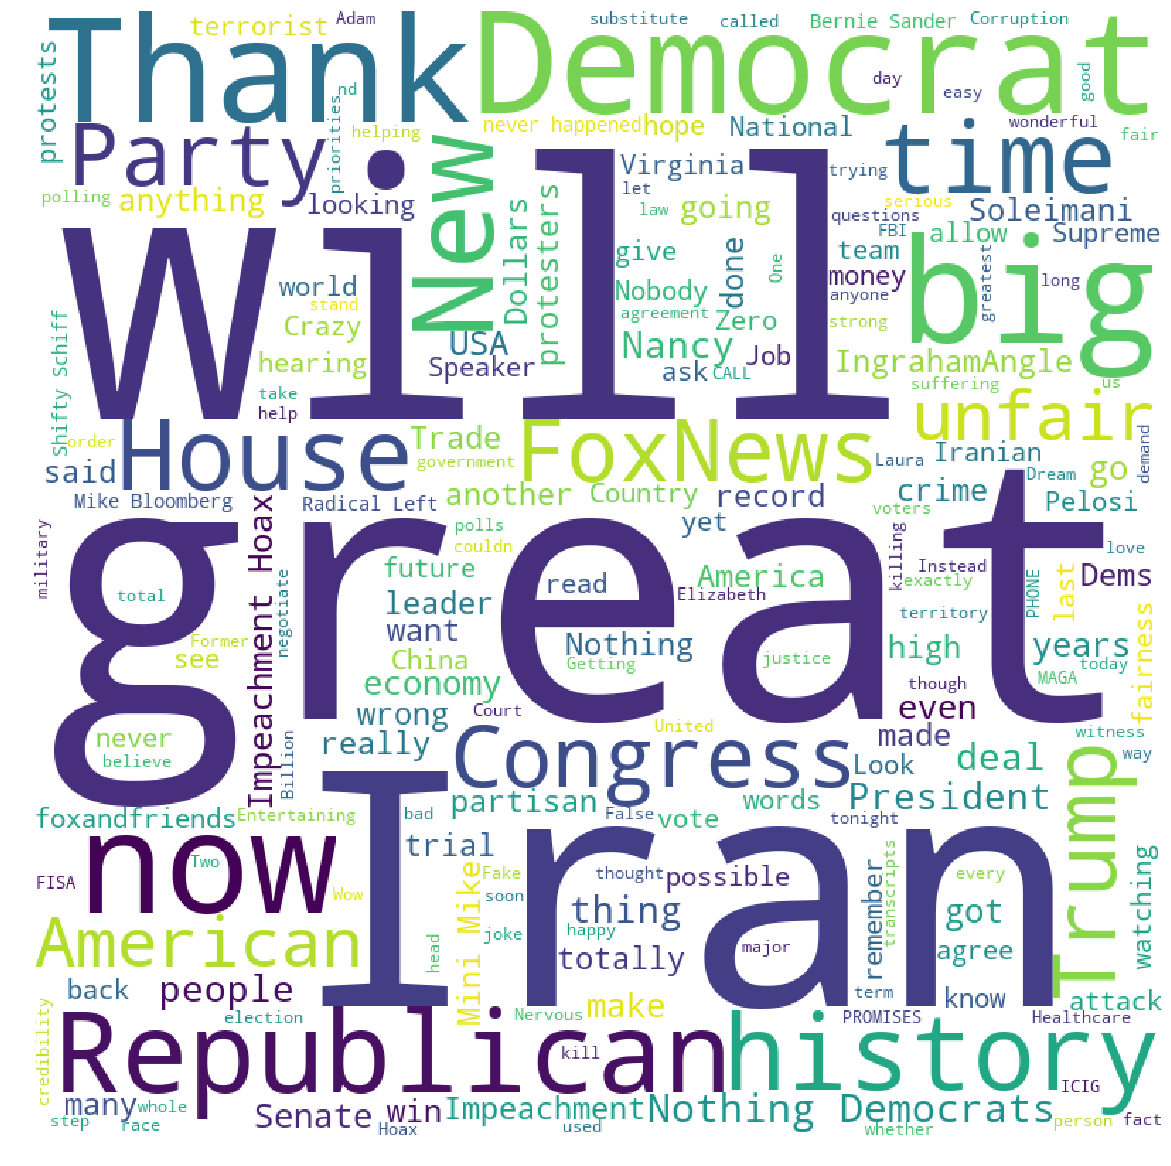

In [14]:
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate((' '.join(Word_List)))
# plot the WordCloud image                        
plt.figure(figsize = (16, 16), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 